In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import plotly.express as px
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [235]:
df = pd.read_csv('/content/new_dataset.csv')


In [236]:
df = df.drop(columns=['dissimil_2D','dissimil_3D'])

In [222]:
corr = df.drop(columns = ['curated_smiles_molecule_b','curated_smiles_molecule_a','pair_type','target_name']).corr()
px.imshow(corr)
df = df.drop(columns = ['curated_smiles_molecule_b','curated_smiles_molecule_a','pair_type','target_name'])

In [237]:
df = df.drop(columns = ['n_answers','id_pair'])

dropped unnecessary columns and those that had very low correlation

In [224]:
y=df['frac_similar']

a = df.drop(columns = ['frac_similar'])

X_train, X_test, y_train, y_test= train_test_split(a,y,test_size = 0.2,random_state = 4 )



used ai for plotting graphs and some syntax 

In [232]:

model = keras.Sequential([
    Dense(6, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

history = model.fit(X_train, y_train, epochs=300, batch_size=10,verbose = 1)

mse = model.evaluate(X_test, y_test, verbose=0)[1]


y_pred = model.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.squeeze()})
print("\nActual vs Predicted:")
print(results.head())
results.to_csv('results.csv', index=False)


Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.5522 - mse: 12.5522  
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.3979 - mse: 10.3979 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1430 - mse: 9.1430 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5427 - mse: 7.5427 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7280 - mse: 6.7280 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3494 - mse: 5.3494 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9519 - mse: 3.9519 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2937 - mse: 3.2937 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1743 - mse: 3.1743 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3776 - mse: 2.3776 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0911 - mse: 2.0911 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7117 - mse: 1.7117 
Epoch 13/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

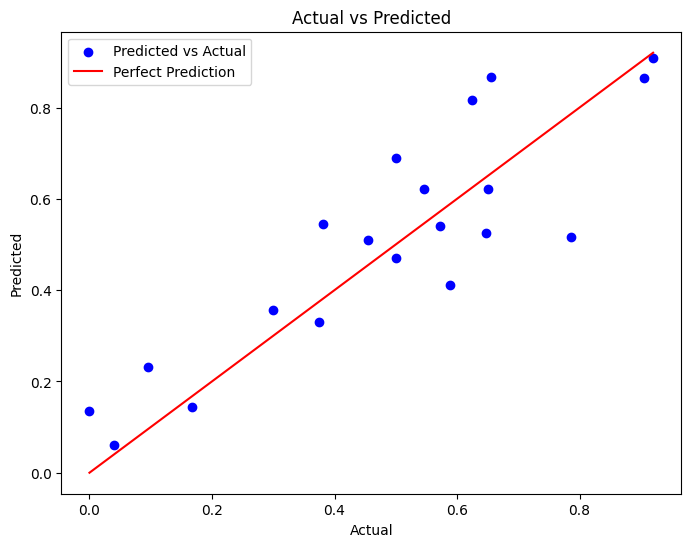

In [233]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

In [234]:
print(f"Mean Squared Error on Test Data: {mse}")

Mean Squared Error on Test Data: 0.015934769064188004
